In [19]:
from qiskit import *
from qiskit.circuit.library import UnitaryGate
from qiskit.circuit.library import HamiltonianGate
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
simulator = AerSimulator()

import numpy as np
from numpy import linalg
import math
import random

from sympy import Matrix
from sympy.physics.quantum import TensorProduct

import matplotlib.pyplot as plt

%run QuantumFourierTransform.ipynb

In [20]:
# Find x to solve Ax >= b

# Input matrix A
A = np.array([[1,1],
              [1,-1],
              [-1,0],
              [1,0],
              [0,1]])

# Input vector b
b = np.array([[1],
             [-1],
             [-1],
             [0],
             [0]])

In [21]:
# Rescale matrix A such that its rows can be encoded as quantum states

def Rescale(A,b):
    A_rescale = []
    b_rescale = []
    for row in range(len(A)):
        length = 0.0
        for entry in range(len(A[row])):
            length = length+(float(A[row][entry])**2)
        length = math.sqrt(length)
        
        temp_A = list(A[row]/length)
        temp_b = list(b[row]/length)
        
        A_rescale.append(temp_A)
        b_rescale.append(temp_b)
    
    new_A = np.array(A_rescale)
    new_b = np.array(b_rescale)
    
    return(new_A, new_b)

In [22]:
# Initializes the algorithm

def Initialize(A,b):
    U = float(max(A.max(),b.max()))
    n = float(len(A[0]))
    
    small_v = n**(-n) * (n*U)**((-n**(2))*(n+1))
    big_V = (2*n)**n *(n*U)**(n**2)
    max_time = math.ceil(2*(n+1)*math.log(big_V/small_v))
    
    radius = big_V/math.pi
    D_0 = radius*np.identity(int(n))
    
    return(max_time, D_0)

In [166]:
# Performs the SWAP test on a and x, to find if their inner product is within alpha of b
def SwapTest(qc,x,a,b,alpha):
    ### Prepair Gates which initialize quantum states ###
    x_matrix = np.array([[0,0,x[0][0],0],
                        [0,0,0,x[1][0]],
                        [x[0][0],0,0,0],
                        [0,x[1][0],0,0]])
    x_gate = HamiltonianGate(x_matrix,4,"x").control(1)
    
    a_matrix = np.array([[0,0,a[0],0],
                        [0,0,0,a[1]],
                        [a[0],0,0,0],
                        [0,a[1],0,0]])
    a_gate = HamiltonianGate(a_matrix,1,"a").control(1)
    
    ### Creating Circuit ###
    qc.h(0)
    qc.append(x_gate,[0,1,2])
    qc.append(a_gate,[0,1,2])
    qc.h(0)
    
    qc.measure(0,0)
    
    ### Testing ###
    job = transpile(qc,backend=simulator)
    shots = int(math.ceil(1/(alpha**2)))
    result = simulator.run(job, shots=shots).result()
    
    ### Post-Processing ###
    # If the inner products are close enough to each other, then it passes. Otherwise, it gives the violated row.
    if abs(math.sqrt(1-2*(result.data()['counts']['0x1']/shots)) - b) >= alpha:
        return 0
    else:
        return a

In [181]:
# Find the violated row of A. Give a rescaled A as above. Give current x, give b, give error alpha
def ViolatedRow(qc,A,x,b,alpha):
    x_norm = linalg.norm(x)
    
    if x_norm <= float(0):
        b_norm = b/x_norm
    else:
        b_norm = b
    
    return x,x_norm,b_norm

In [182]:
qc = QuantumCircuit(3,1)
M,c = Rescale(A,b)
x = np.array([[0],
              [0]])

ViolatedRow(qc,M,x,c,.01)

C:\Users\Ben\AppData\Local\Temp\ipykernel_14272\645913594.py:6: RuntimeWarning: divide by zero encountered in divide
  b_norm = b/x_norm
C:\Users\Ben\AppData\Local\Temp\ipykernel_14272\645913594.py:6: RuntimeWarning: invalid value encountered in divide
  b_norm = b/x_norm


(array([[0],
        [0]]),
 0.0,
 array([[ inf],
        [-inf],
        [-inf],
        [ nan],
        [ nan]]))

In [ ]:
qc = QuantumCircuit(3,1)
ViolatedRow()

In [7]:
def MainLoop(A,b,max_time,D_0):
    t = 0
    while t <= max_time:
        t = t+1
        
    return print("P is empty")

In [8]:
A,b = Rescale(A,b)
max_time, D_0 = Initialize(A,b)

MainLoop(A,b,max_time,D_0)

P is empty


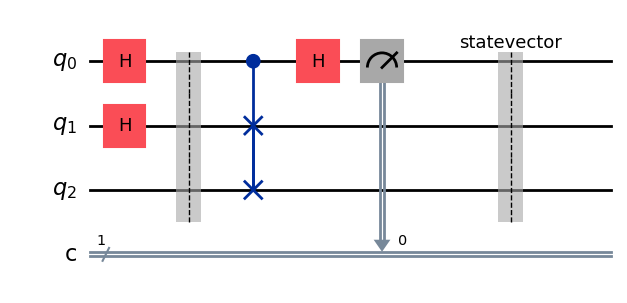

In [44]:
qc = QuantumCircuit(3,1)

qc.h(0)
qc.h(1)

qc.barrier(label=' ')
qc.cswap(0,1,2)
qc.h(0)

qc.measure(0,0)
qc.save_statevector()

qc.draw(output='mpl')

In [45]:
job = transpile(qc,backend=simulator)
shots = 5

result = simulator.run(job, shots=shots).result()
    
psi = result.get_statevector(0)
psi.draw(output='latex')

<IPython.core.display.Latex object>